In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import integrate, interpolate

In [66]:
type = 2
day_type = "Weekday"
month = "July"
year = 2024

In [67]:
source_file_name = f"Type 1.{type} Demand Profile {day_type} {month} {year}.csv"
save_file_name = f"Type 1.{type} Unit Demand Profile {day_type} {month} {year}.csv"

In [68]:
source_daily_demand_profile_df = pd.read_csv(source_file_name)

# Interporlate the demand profile
x_new = np.arange(0, 24, 0.5)
interpolate_function = interpolate.interp1d(
    source_daily_demand_profile_df["x"],
    source_daily_demand_profile_df[" y"],
    kind="linear",
    fill_value="extrapolate",
)
y_new = interpolate_function(x_new)

daily_demand_profile_interpolated_df = pd.DataFrame({"time": x_new, "Demand": y_new})

# Normalize the demand profile
area = integrate.trapezoid(y_new, x_new)

y_normalized = y_new / area
daily_demand_profile_normalized_df = pd.DataFrame({"time": x_new, "Demand": y_normalized})

Text(0, 0.5, 'Usage Density')

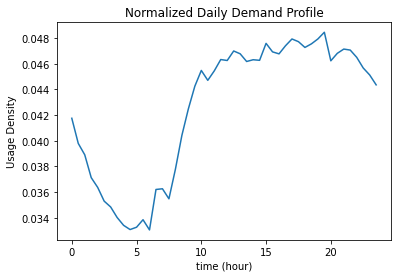

In [69]:
plt.plot(daily_demand_profile_normalized_df["time"], daily_demand_profile_normalized_df["Demand"])
plt.title("Normalized Daily Demand Profile")
plt.xlabel("time (hour)")
plt.ylabel("Usage Density")

In [70]:
daily_demand_profile_normalized_df.to_csv(save_file_name, index=False)